In [1]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
# model parameters:
g = 9.8  # gravity in m s^{-2}
v_t = 4.9  # trim velocity in m s^{-1}
C_D = 1/5  # drag coefficient --- or D/L if C_L=1
C_L = 1  # for convenience, use C_L = 1

### set initial conditions ###
v0_array = numpy.linspace(0.75*v_t, 1.5*v_t, 20)
theta0_array = numpy.linspace(-15, 25, 9) * numpy.pi/180.0
x0 = 0  # horizontal position is arbitrary
y0 = 2  # initial altitude

In [3]:
def f(u):
    """Returns the right-hand-side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
    
    Returns
    -------
    dudt : array of float
           array containing the RHS given u.
    """
    
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                        -g*cos(theta)/v + g/v_t**2*v,
                        v*cos(theta),
                        v*sin(theta)])

In [4]:
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right-hand-side of the system of equations.
    dt : float
         time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
                approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [5]:
distance__vs__v0_theta0 = {}
trajectory__vs__v0_theta0 = {}
max_distance = None
dt = 0.1
for v0 in v0_array:
    for theta0 in theta0_array:
        x_list = [x0,]
        y_list = [y0,]
        u = numpy.array([v0, theta0, x0, y0]) 
        counter = 0
        while True:
            counter = counter + 1
            if counter > 10000:
                break
            u_next = euler_step(u, f, dt)
            x_next = u_next[2]
            y_next = u_next[3]
            if y_next < 0:
                break
            x_list.append(x_next)
            y_list.append(y_next)
            u = u_next
        distance__vs__v0_theta0[(v0, theta0)] = x_list[-1]
        trajectory__vs__v0_theta0[(v0, theta0)] = (x_list.copy(), y_list.copy())
        if max_distance is None:
            max_distance = x_list[-1]
            max_v0 = v0
            max_theta0 = theta0
        elif x_list[-1] > max_distance:
            max_distance = x_list[-1]
            max_v0 = v0
            max_theta0 = theta0
        #print("v0: " + str(v0) + "  theta0: " + str(theta0*180/numpy.pi) + "  distance: " + str(x_list[-1]))
(max_x_list, max_y_list) = trajectory__vs__v0_theta0[(max_v0, max_theta0)]
print("Initial conditions for max distance:" + "\n" + \
      "v0: " + str(max_v0) + "\n" + \
      "theta0: " + str(max_theta0*180/numpy.pi) + "\n" + \
      "distance: " + str(max_distance) )

Initial conditions for max distance:
v0: 6.96315789474
theta0: -5.0
distance: 15.502604977


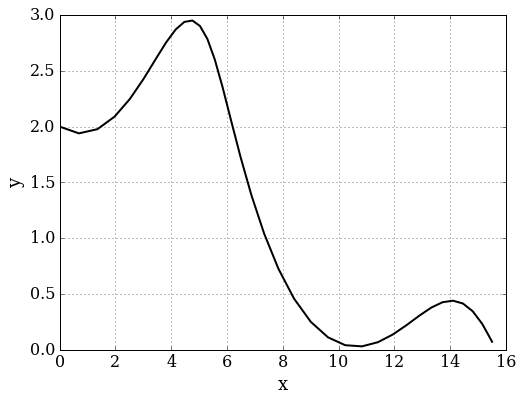

In [6]:
# visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.plot(max_x_list, max_y_list, 'k-', lw=2);